In [ ]:
# To Do! 사람이 손글씨로 쓴 0~9 숫자 이미지 분류 모델
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 데이터 정규화

ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
train_size = int(len(x_train) * 0.7) # train:valid = 7:3

# 배치 사이즈(20) : 학습 시 샘플 수 (작을수록 가중치 갱신이 자주 일어남) <= 전체 학습 데이터셋
train_ds = ds.take(train_size).batch(20) 
val_ds = ds.skip(train_size).batch(20)

# 순차 모델 : 신경망 계층을 순차적으로 더함 (cf. 함수형 모델(functional model) : 복잡한 신경망)
model = Sequential()
model.add(Flatten(input_shape=(28, 28))) # 입력층 : 2차원 이미지(28X28) -> 1차원으로 평탄화(Flatten)(뉴런이 28X28=784개가 됨)
model.add(Dense(20, activation='relu')) # 은닉층1
model.add(Dense(20, activation='relu')) # 은닉층2
model.add(Dense(10, activation='softmax')) # 출력층 : 숫자(0~9)

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',  # loss : (실제값 - 모델의 출력값) = 오차를 계산하는 손실함수 / optimizer : 오차 보정
              metrics=['accuracy']) # 모델 성능 평가 측정 항목

# 모델 학습
hist = model.fit(train_ds, validation_data=val_ds, epochs=10)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/10
2100/2100 [==============================] - 5s 2ms/step - loss: 1.0166 - accuracy: 0.6732 - val_loss: 0.4370 - val_accuracy: 0.8724
Epoch 2/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.3855 - accuracy: 0.8884 - val_loss: 0.3257 - val_accuracy: 0.9048
Epoch 3/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.3170 - accuracy: 0.9083 - val_loss: 0.2809 - val_accuracy: 0.9153
Epoch 4/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2699 - accuracy: 0.9212 - val_loss: 0.2457 - val_accuracy: 0.9277
Epoch 5/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2432 - accuracy: 0.9302 - val_loss: 0.2205 - val_accuracy: 0.9354
Epoch 6/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2177 - accuracy: 0.9379 - val_loss: 0.1990 - val_accuracy: 0.9414
Epoch 7/10
2100/2100 [==============================] - 4s 2ms/step - l

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1695 - accuracy: 0.9482


[0.16950832307338715, 0.948199987411499]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.save('mnist_model.h5')

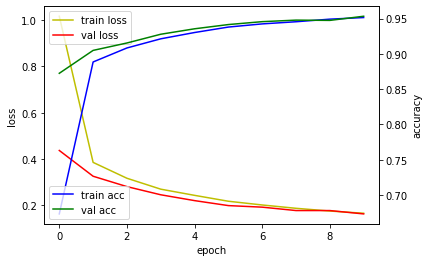

In [ ]:
# 학습 히스토리 데이터 그래프
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [14]:
from tensorflow.keras.models import load_model

_, (x_test, y_test) = mnist.load_data()
x_test = x_test / 255.0 # 데이터 정규화

model = load_model('mnist_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.1695 - accuracy: 0.9482


[0.16950832307338715, 0.948199987411499]

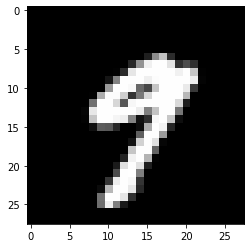

In [16]:
# 테스트셋에서 20번째 흑백 이미지 출력
plt.imshow(x_test[20], cmap='gray') 
plt.show()

In [35]:
import numpy as np

picks = [20]
predict = np.argmax(model.predict(x_test), axis=1)[picks]

print('손글씨 이미지 예측값 :', predict)

손글씨 이미지 예측값 : [9]
